# Email Spam Classifier

![alt text](detector.png)

# About Dataset

## Context

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

## Content

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

* A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [[Web Link](https://www.grumbletext.co.uk)].

* A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [[Web Link](https://www.comp.nus.edu.sg/~rpnlpir/downloads/corpora/smsCorpus/)].

* A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [[Web Link](https://etheses.bham.ac.uk/id/eprint/253/1/Tagg09PhD.pdf)].

* Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [[Web Link](http://www.esp.uem.es/jmgomez/smsspamcorpus/)].

## Acknowledgements

The original dataset can be found here. The creators would like to note that in case you find the dataset useful, please make a reference to previous paper and the web page: http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/ in your papers, research, etc.

We offer a comprehensive study of this corpus in the following paper. This work presents a number of statistics, studies and baseline results for several machine learning methods.

Almeida, T.A., GÃ³mez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results. Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011.

# Dataset Sources:

https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

# Project Flow:

* 1. Data cleaning
* 2. EDA
* 3. Text Preprocessing
* 4. Model building
* 5. Evaluation
* 6. Improvement
* 7. Website
* 8. Deploy

# 1. Data Cleaning & Preprocessing

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

## How big is the Data?

In [3]:
df.shape

(5572, 5)

## How does the data look like?

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2372,ham,Watching tv lor... Y she so funny we bluff her...,NaN,NaN,NaN
893,ham,It's ok i noe u're busy but i'm really too bor...,NaN,NaN,NaN
1569,ham,I dont have that much image in class.,NaN,NaN,NaN
1047,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...,NaN,NaN,NaN
4477,ham,I anything lor.,NaN,NaN,NaN


## What is the data type of the columns?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Selection of the Relevant Features

* v1 - Target Column (Spam or Ham)
* v2 - Raw text (mails)

In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
604,ham,Meet after lunch la...
4029,ham,"Cool, I'll text you in a few"
5327,ham,Wishing you a wonderful week.
1309,ham,"Ok, be careful ! Don't text and drive !"
4620,ham,"Received, understood n acted upon!"


In [8]:
# renaming the cols
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
794,ham,There generally isn't one. It's an uncountable...
3162,spam,This is the 2nd time we have tried to contact ...
4809,ham,"Honey, can you pls find out how much they sell..."
2916,ham,Yes. that will be fine. Love you. Be safe.
3675,ham,Hey r Ì_ still online? I've finished the forma...


## Encoding the texts `spam` and `ham` into binary representations as `1` and `0` 

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.sample(5)

,target,text
4068,0,Hope youåÕre not having too much fun without m...
3668,0,Yeah imma come over cause jay wants to do some...
29,0,Ahhh. Work. I vaguely remember that! What does...
4581,0,Wow didn't think it was that common. I take it...
4549,0,\Hey! do u fancy meetin me at 4 at cha åÐ hav ...


## Are there any Missing Values

In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

## Are there any Duplicated Values

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2. Exploratory Data Analysis

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

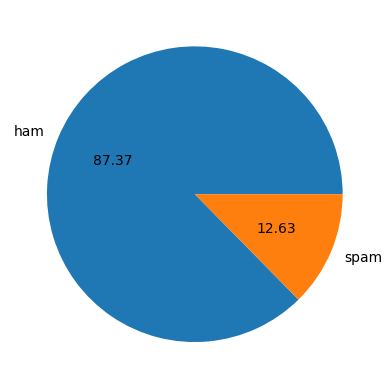

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

### From the above pie chart we can deduce that the dataset is imbalanced

In [21]:
import nltk

### Adding a new feature named `num_characters` to store the total number of characters in the text

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Adding a new feature named `num_words` to store the total number of words in the text

In [24]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### Adding a new feature named `num_sentences` to store the total number of sentences in the text

In [26]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Getting a brief overview of the newly added Features

In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


## Getting a Overview of the `ham` category based on the newly added features

In [28]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


## Getting a Overview of the `spam` category based on the newly added features

In [29]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [30]:
import seaborn as sns

## Plotting the distribution of both categories based on the number of characters

<Axes: xlabel='num_characters', ylabel='Count'>

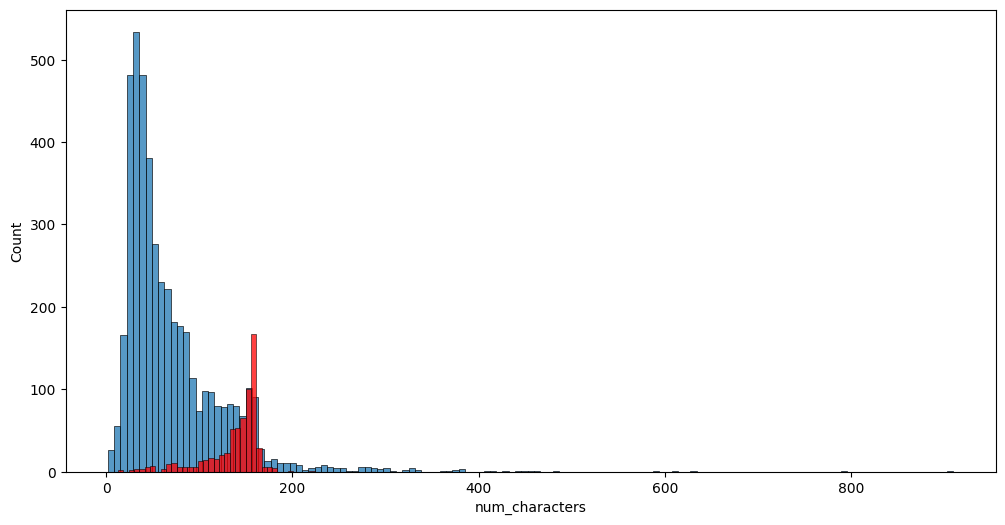

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

## Plotting the distribution of both categories based on the number of words

<Axes: xlabel='num_words', ylabel='Count'>

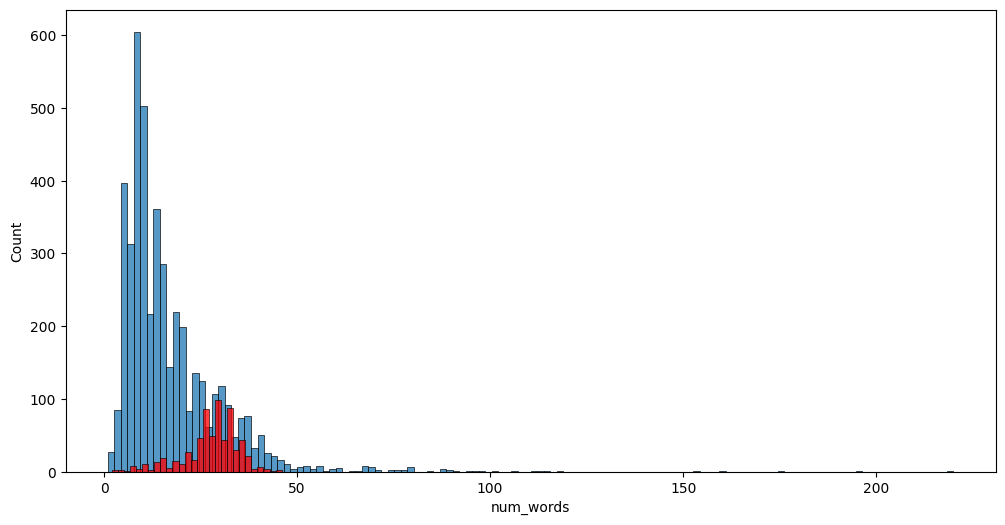

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

## Visualizing a Pairplot of the entire dataframe based on the target column

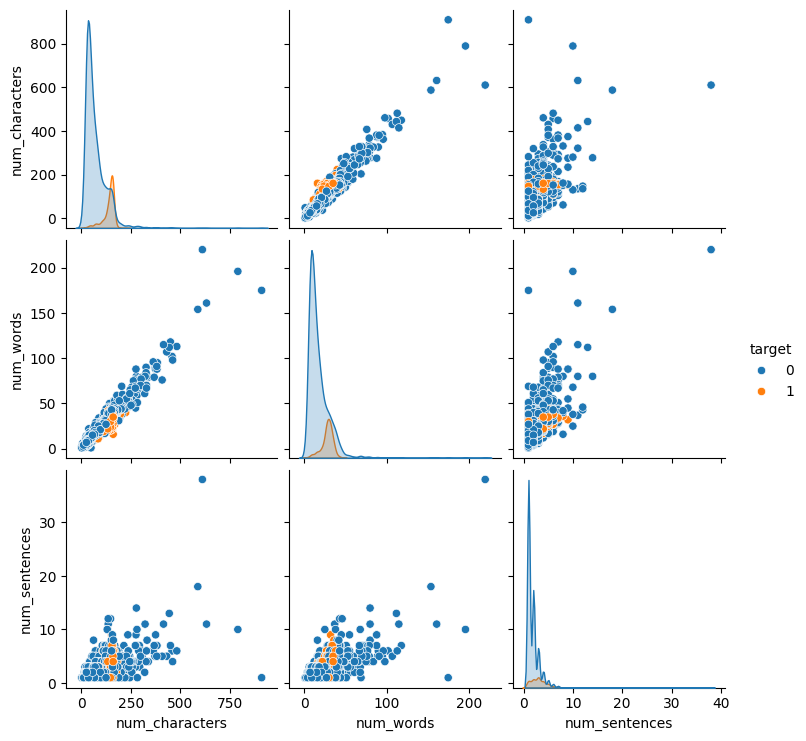

In [33]:
sns.pairplot(df,hue='target')

## Finding the Correlation among different columns/features using Heatmap

In [34]:
df_temp = df.drop(columns='text')

<Axes: >

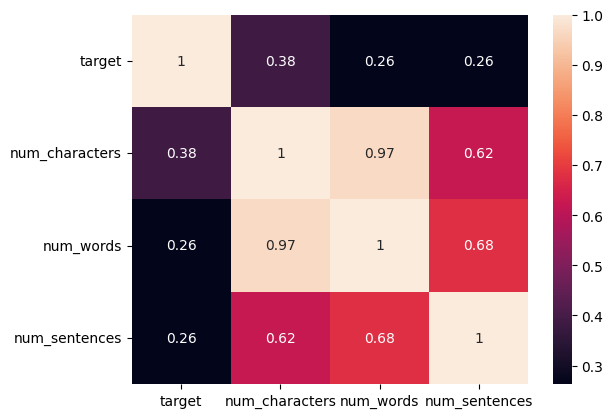

In [35]:
sns.heatmap(df_temp.corr(),annot=True)

# 3. Text Preprocessing

- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Lemmatization using Spacy

In [36]:
import string
import spacy

# Load the spaCy English model
nlp = spacy.load('en_core_web_md')

def transform_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text using spaCy
    doc = nlp(text)
    
    # Filter out stopwords and punctuation
    tokens = [token.text for token in doc if not token.is_stop and token.text not in string.punctuation]
    
    # Lemmatize tokens
    lemmatized_tokens = [token.lemma_ for token in nlp(' '.join(tokens))]
    
    # Join the lemmatized tokens into a sentence
    lemmatized_text = ' '.join(lemmatized_tokens)
    
    return lemmatized_text


In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cry today'

## Creating a new column named `transformed_text` by applying the above text preprocessing function on the entire `text` column.

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazy .. available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun early hor ... u c ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

## Visualizing the Spam Words using WordCloud

In [41]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

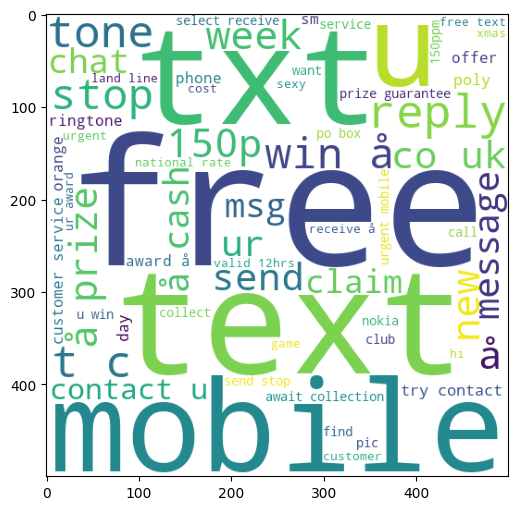

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

## Visualizing the Ham(Not Spam) Words using WordCloud

In [43]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

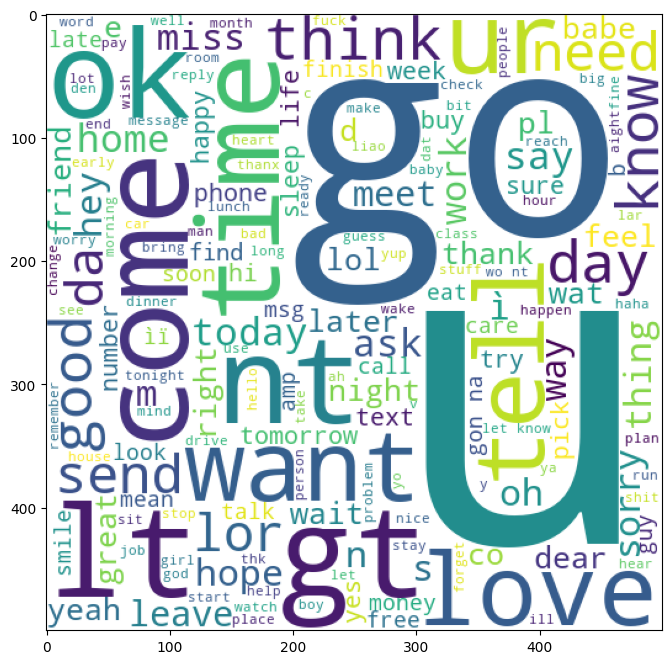

In [44]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [45]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

10402

In [54]:
# import warnings
# warnings.filterwarnings("ignore")

# # Now import other libraries and continue with your code
# from collections import Counter
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming spam_corpus is your list of data
# # Replace spam_corpus with your actual data structure

# # Step 1: Count frequencies of each item in spam_corpus
# word_counts = Counter(spam_corpus).most_common(30)

# # Step 2: Convert to DataFrame for easier plotting
# df = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# # Step 3: Define a rainbow color palette
# colors = sns.color_palette("husl", len(df))

# # Step 4: Plot using seaborn with the specified palette
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Word', y='Count', data=df, palette=colors)
# plt.xticks(rotation='vertical')
# plt.title('Top 30 Words in Spam Corpus with Rainbow Effect')
# plt.show()


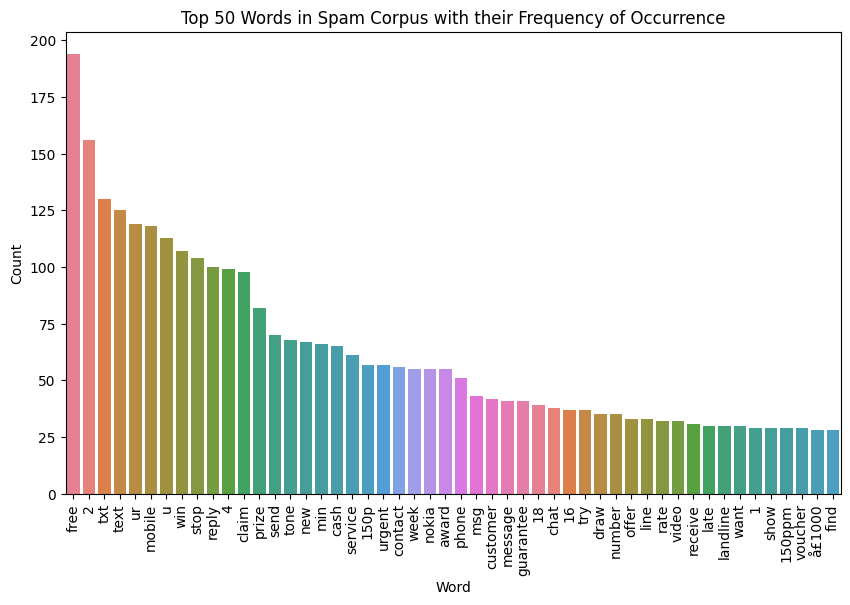

In [52]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming spam_corpus is your list of data
# Replace spam_corpus with your actual data structure

# Step 1: Count frequencies of each item in spam_corpus
word_counts = Counter(spam_corpus).most_common(50)

# Step 2: Convert to DataFrame for easier plotting
spam = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Step 3: Define a rainbow color palette
# You can choose any color palette from seaborn or define your own
colors = sns.color_palette("husl", len(df))

# Step 4: Plot using seaborn with the specified palette
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
sns.barplot(x='Word', y='Count', data=spam, palette=colors)
plt.xticks(rotation='vertical')
plt.title('Top 50 Words in Spam Corpus with their Frequency of Occurrence')
plt.show()


In [48]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

34024

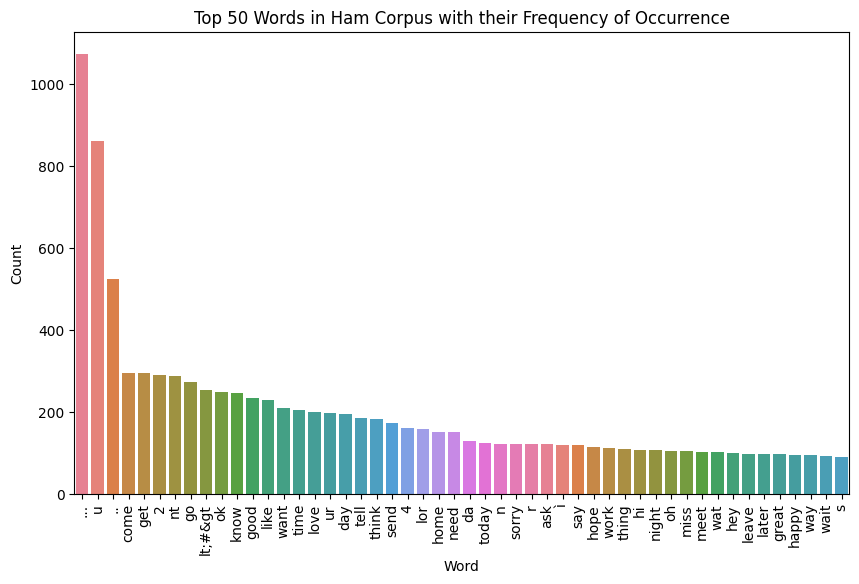

In [53]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count frequencies of each item in spam_corpus
word_counts = Counter(ham_corpus).most_common(50)

# Step 2: Convert to DataFrame for easier plotting
ham = pd.DataFrame(word_counts, columns=['Word', 'Count'])

# Step 3: Define a rainbow color palette
# You can choose any color palette from seaborn or define your own
colors = sns.color_palette("husl", len(df))

# Step 4: Plot using seaborn with the specified palette
plt.figure(figsize=(10, 6))  # Adjust figure size if necessary
sns.barplot(x='Word', y='Count', data=ham, palette=colors)
plt.xticks(rotation='vertical')
plt.title('Top 50 Words in Ham Corpus with their Frequency of Occurrence')
plt.show()

# 4. Model Building

### Using Tfidf Vectorizer to convert the `transformed_text` into Vectors and storing it in variable `X`

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

### Storing the `target` in a variable `y`

In [68]:
y = df['target'].values

### Performing Train, Test and Split on the above X and y

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

### As Naive Bayes Algo is said to perform the best for textual data so we will start with Naive Bayes Algorithm and then experiment with other Algorithms later. As it's an imbalanced dataset, Accuracy won't matter much but the Precision needs to be the Highest as it's a High-Precision Application

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

## A) Gaussian Naive Bayes

In [84]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred1))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))
print("F1 Score: ", f1_score(y_test,y_pred1))

Accuracy Score:  0.8529980657640233
Confusion Matrix:  [[760 136]
 [ 16 122]]
Precision Score:  0.4728682170542636
F1 Score:  0.6161616161616161


## B) Multinomial Naive Bayes

In [82]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred1))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))
print("F1 Score: ", f1_score(y_test,y_pred1))

Accuracy Score:  0.8529980657640233
Confusion Matrix:  [[760 136]
 [ 16 122]]
Precision Score:  0.4728682170542636
F1 Score:  0.6161616161616161


## C) Bernoulli Naive Bayes

In [83]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred1))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))
print("F1 Score: ", f1_score(y_test,y_pred1))

Accuracy Score:  0.8529980657640233
Confusion Matrix:  [[760 136]
 [ 16 122]]
Precision Score:  0.4728682170542636
F1 Score:  0.6161616161616161


## So we selected TfIdf and Multinomial Naive Bayes as it's giving a Precision Score of 1.0 which is highly accurate and desirable

## Now we will try other Classification models and check if we can bring any further Improvement

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    return accuracy,precision,f1

In [78]:
accuracy_scores = []
precision_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision, current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)

In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy Score':accuracy_scores,'Precision Score':precision_scores,'F1 Score':f1_scores}).sort_values('Precision Score',ascending=False)
performance_df

,Algorithm,Accuracy Score,Precision Score,F1 Score
1,KN,0.903288,1.000000,0.431818
2,NB,0.979691,1.000000,0.917647
9,GBDT,0.945841,1.000000,0.745455
0,SVC,0.977756,0.975207,0.911197
5,RF,0.974855,0.974576,0.898438
6,AdaBoost,0.968085,0.972973,0.867470
8,ETC,0.979691,0.968000,0.920152
10,xgb,0.975822,0.966942,0.903475
4,LR,0.954545,0.933333,0.806584
7,BgC,0.968085,0.906977,0.876404


In [98]:
# Voting Classifier
from sklearn.ensemble import VotingClassifier

# knc = KNeighborsClassifier()
mnb = MultinomialNB()
etc = ExtraTreesClassifier()

voting = VotingClassifier(estimators=[('NB', mnb),('etc', etc)],voting='soft')

voting.fit(X_train,y_train)

y_pred = voting.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

Accuracy Score:  0.9854932301740812
Precision:  1.0
F1 Score:  0.9425287356321839


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(voting, open('voting.pkl','wb'))